# 1. Prepare modules 

In [1]:
# ! pip install yfinance # Uncomment this line and install the yfinance package if you haven't. 

*yfinance* is an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes. *yfinance* is not affiliated, endorsed, or vetted by Yahoo, Inc. https://pypi.org/project/yfinance/ 

In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt 

# 2. Download 10 financial variables using *yfinance*. 


1.   BTC-USD: bitcoin price in us dollars (USD)
2.   ^GSPC: S&P 500
3. ^DJI: Dow Jones Industrial Average
4. ^IXIC: NASDAQ Composite
5. CL=F: Crude Oil price
6. GC=F: Gold price
7. EURUSD=X: EUR/USD exchange rate
8. ^TNX: Treasury Yield 10 Years; 
9. ETH-USD: Ethereum price in USD
10. USDT-USD: Tether price in USD

In [3]:
start_date="2016-01-01"
end_date="2019-11-22"

In [4]:
yfin_data = yf.download( 
        tickers = 'BTC-USD ^GSPC ^DJI ^IXIC CL=F GC=F EURUSD=X ^TNX USDT-USD ETH-USD',
        start=start_date, 
        end=end_date)[['Close']]

[*********************100%***********************]  10 of 10 completed


In [5]:
# Change column names 
yfin_data.columns

MultiIndex([('Close',  'BTC-USD'),
            ('Close',     'CL=F'),
            ('Close',  'ETH-USD'),
            ('Close', 'EURUSD=X'),
            ('Close',     'GC=F'),
            ('Close', 'USDT-USD'),
            ('Close',     '^DJI'),
            ('Close',    '^GSPC'),
            ('Close',    '^IXIC'),
            ('Close',     '^TNX')],
           )

In [6]:
yfin_data.columns = ['btc', 'oil', 'ethereum', 'euro', 'gold', 'tether', 'dow', 'sp', 'nasdaq', 'tenyear']

In [7]:
yfin_data.shape

(1421, 10)

In [8]:
yfin_data.head()

,btc,oil,ethereum,euro,gold,tether,dow,sp,nasdaq,tenyear
Date,,,,,,,,,,
2016-01-01,434.334015,NaN,NaN,1.085906,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,433.437988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,430.010986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,433.091003,36.759998,NaN,1.085399,1075.099976,NaN,17148.939453,2012.660034,4903.089844,2.245
2016-01-05,431.959991,35.970001,NaN,1.082755,1078.400024,NaN,17158.660156,2016.709961,4891.430176,2.248


# Visualization of Bitcoin price movements (absoulte values)

In [9]:
type(start_date)

str

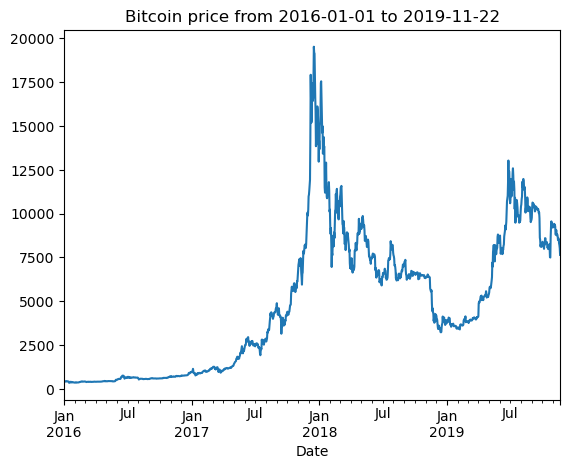

In [10]:
yfin_data.btc.plot(title='Bitcoin price from ' + start_date + ' to ' + end_date);

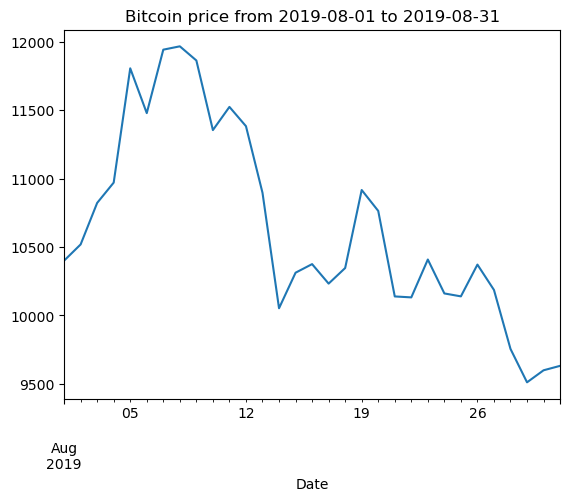

In [11]:
yfin_data[(yfin_data.index >= '2019-08-01')&  (yfin_data.index <='2019-08-31')].btc.plot(title='Bitcoin price from 2019-08-01 to 2019-08-31');

# 3. Process data

In [13]:
yfin_data_processed = yfin_data.copy()
columns = yfin_data.columns

In [14]:
# Add 1) yesterday price and 2) price change compared to yesterday for each variable. 
for data in columns:
    # Set new column names     
    data_yesterday = data + '_ytd'
    data_change_yesterday = data + '_change_ytd'
    # Shift(1) to add yesterday price 
    yfin_data_processed[data_yesterday] = yfin_data_processed[data].shift(1) 
    # Add a change variable, which equals to 1 if price goes up compared to yesterday, otherwise 0. 
    yfin_data_processed[data_change_yesterday] = (yfin_data_processed[data] > yfin_data_processed[data_yesterday]).astype(int) # Create columns for price change, 1 for up, 0 for down or nochange. 

In [15]:
# Add 1) tomorrow price and 2) price change compared to tomorrow for each variable. 
for data in columns:
    # Set new column names     
    data_tomorrow = data + '_tmr'
    data_change_tomorrow = data + '_change_tmr'
    # Shift(-1) to add tomorrow price 
    yfin_data_processed[data_tomorrow] = yfin_data_processed[data].shift(-1) 
    # Add a change variable, which equals to 1 if tomorrow price goes up, otherwise 0. 
    yfin_data_processed[data_change_tomorrow] = (yfin_data_processed[data_tomorrow] > yfin_data_processed[data]).astype(int) # Create columns for price change, 1 for up, 0 for down or nochange. 

In [16]:
yfin_data_processed.btc_change_tmr.value_counts()
# It is rather balanced!

1    793
0    628
Name: btc_change_tmr, dtype: int64

# 4. Save

In [17]:
yfin_data_processed.to_csv('yfinance_2016_2019.csv') 
# Only uncomment and run this if you want to rewrite the file!